## Classification with Keras

In [ ]:
Using The MINST database

## Classification Models with keras


In [6]:
!pip install matplotlib

In [4]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [5]:
import matplotlib.pyplot as plt

In [6]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

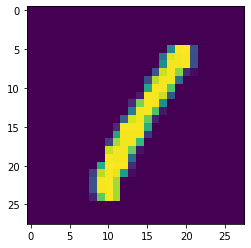

In [8]:
plt.imshow(X_train[3])

In [9]:
# flatten the images into one-dimensional vector

num_pixels = X_train.shape[1]*X_train.shape[2] 
num_pixels

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') #flatten training images
X_test =X_test.reshape(X_test.shape[0], num_pixels).astype('float32') #flatten test images

In [10]:
#normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255


In [11]:
# one hot encode outputs

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


### Build a Neural Network


In [12]:
# define classification Model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels,activation = 'relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation= 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    #compile model
    model.compile(optimizer = 'adam', loss= 'categorical_crossentropy',metrics=['accuracy'])
    return model

### Train and Test the Network

In [ ]:
# build the model
model = classification_model()

#fit the model
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

#evaluate the model
scores = model.evaluate(X_test,y_test, verbose=0)

In [ ]:
# print out the auccuracy and the corresponding error.
print('Accuracy: {}% \n Error: {}'. format(scores[1], 1 - scores[1]))

In [ ]:
# saving model as h5 files
model.save ('classification_model.h5')


In [ ]:
# loading the model 
from keras.model import load_model

pretrained_model = load_model('classification_model.h5')